<a href="https://colab.research.google.com/github/1012357482/ConsumoAguaSeriesTemporales/blob/developer/ConsumoAguaSeriesTemporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# **Proyecto predicción del consumo del agua**

</center>


<center>
  <img src="https://colombiaestudia.com/wp-content/uploads/2021/12/1154.png" width="300" height="300">
</center>


<center>

#Escuela Tecnólogica Instituto Técnico Central

##*Facultad Ingenieria de Sistemas**

###*Electiva Técnica IV, Ciencia de datos*

### Profesor: Elías Buitrago

### Alumnos: Ferrixon Matiz, Camilo Reyes.
</center>

**Índice**   
0. [Obtención de los datos](#id0) <br>
1. [Preprocesado de los datos](#id1) <br>
  1.1.[Selección de los datos](#id11) <br>
  1.2.[Análisis exploratorio de datos](#id12)<br>
  1.3.[Limpieza de datos](#id13)<br>
  1.4.[Manejo de datos faltantes](#id14)<br>
2. [Análisis exploratorio de los datos(EDA).](#id2)<br>
3. [Modelos y algoritmos (ARIMA)](#id3)

#0. Obtención de los datos <a name="id0">

Para trabajar sobre la predicción del consumo de agua residencial en la ciudad de Bogotá se vio la necesidad de obtener un dataset oconjutno de datos que fuese fiable en cuanto a la validez de su data además de la fiabilidad de su procedencia.</br>
En la busqueda de la data fue posible obtener el siguiente dataset perteneciente a la superintendencia de servició públicos domiciliarios.

[Consumo de Agua](https://www.superservicios.gov.co/sites/default/files/inline-files/Consumos-Historicos-de-Agua-Potable-2014-2021.xlsx).

* Este conjunto de datos resume el consumo historico de agua en metros cúbicos entre los años 2014 y 2021 en varias zonas residenciales de Colombia.

* Sera propósito del proyecto determinar el consumo de agua para el año 2022, haciendo uso de las series temporales.

* El análisis de series temporales es fundamental en la toma de decisiones en campos como la economía, la gestión de inventarios, la meteorología y la planificación empresarial, ya que ayuda a comprender y anticipar patrones y cambios a lo largo del tiempo.

#1. Preprocesado <a name="id1">

Para entender realmente el conjunto de datos, se estudiará el significado y la relevancia de cada variable con respecto al problema. Se buscará responder a diversas cuestiones sobre ellas, como:

*  Entendimiento de los datos.
*  La relevancia de las variables.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 Selección de los datos. <a name="id11">

In [5]:
dataset_general=pd.read_csv('/content/drive/MyDrive/Consumos-Historicos-de-Agua-Potable-2014-2021.csv', sep=';')

In [6]:
dataset_general.head()

,IDENTIFICADOR EMPRESA,EMPRESA,AÑO,CÓDIGO DANE,DEPARTAMENTO,MUNICIPIO,1T,2T,3T,4T,5T,6T,1P,2P,3P,4P,5P,6P
0,980,MUNICIPIO DE PUERTO NARIÑO,2014,91540,AMAZONAS,PUERTO NARINO,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76,OFICINA DE SERVICIOS PÚBLICOS DE MONTEBELLO,2014,5467,ANTIOQUIA,MONTEBELLO,9.377,21.342,28.045,NaN,NaN,NaN,"10,75","9,52","9,32",NaN,NaN,NaN
2,77,EMPRESAS PUBLICAS MUNICIPALES DE PUERTO NARE E...,2014,5585,ANTIOQUIA,PUERTO NARE,227.554,393.354,59.762,NaN,NaN,NaN,"15,17","15,93","14,80",NaN,NaN,NaN
3,91,EMPRESA DE SERVICIOS PUBLICOS LA UNION S.A E.S.P.,2014,5400,ANTIOQUIA,LA UNION,41.721,314.515,111.779,4.155,NaN,NaN,"13,56","11,15","11,37","28,85",NaN,NaN
4,96,EMPRESA DE SERVICIOS PÚBLICOS DE EL CARMEN DE ...,2014,5148,ANTIOQUIA,EL CARMEN DE VIBORAL,13.849,369.051,608.558,1.417,NaN,NaN,"12,91","10,96","9,76","4,70",NaN,NaN


## 1.2 Análisis exploratorio de datos. <a name="id12">

In [7]:
dataset_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   IDENTIFICADOR EMPRESA  6942 non-null   int64 
 1   EMPRESA                6942 non-null   object
 2   AÑO                    6942 non-null   int64 
 3   CÓDIGO DANE            6942 non-null   int64 
 4   DEPARTAMENTO           6942 non-null   object
 5   MUNICIPIO              6942 non-null   object
 6   1T                     6803 non-null   object
 7   2T                     6532 non-null   object
 8   3T                     5699 non-null   object
 9   4T                     3221 non-null   object
 10  5T                     1501 non-null   object
 11  6T                     1023 non-null   object
 12  1P                     5413 non-null   object
 13  2P                     6015 non-null   object
 14  3P                     5322 non-null   object
 15  4P                   

## 1.3 Limpieza de datos.<a name="id13"></br>
 Se filtra el dataset para la ciudad  de Bógota D.C.

In [9]:
dataset_general['MUNICIPIO'].unique()

array(['PUERTO NARINO', 'MONTEBELLO', 'PUERTO NARE', 'LA UNION',
       'EL CARMEN DE VIBORAL', 'MEDELLIN', 'BARBOSA', 'BELLO', 'CALDAS',
       'COPACABANA', 'ENVIGADO', 'GIRARDOTA', 'ITAGUI', 'LA ESTRELLA',
       'SABANETA', 'CAMPAMENTO', 'URRAO', 'ANZA', 'GUARNE', 'FRONTINO',
       'PENOL', 'ALEJANDRIA', 'BELMIRA', 'GUATAPE', 'ABEJORRAL',
       'SAN VICENTE', 'CONCEPCION', 'CONCORDIA', 'LA CEJA', 'NECOCLI',
       'SAN PEDRO DE URABA', 'AMALFI', 'ANORI', 'ARBOLETES', 'ARMENIA',
       'PUERTO TRIUNFO', 'SAN JOSE DE LA MONTANA', 'SAN PEDRO',
       'SANTA ROSA DE OSOS', 'TITIRIBI', 'VENECIA', 'ANDES',
       'CIUDAD BOLIVAR', 'JARDIN', 'SEGOVIA', 'RIONEGRO', 'CAROLINA',
       'PUERTO BERRIO', 'FREDONIA', 'SANTA BARBARA', 'ZARAGOZA',
       'EL SANTUARIO', 'YOLOMBO', 'GOMEZ PLATA', 'MARINILLA', 'GRANADA',
       'COCORNA', 'CAICEDO', 'YONDO', 'RETIRO', 'TOLEDO', 'SANTO DOMINGO',
       'ENTRERRIOS', 'OLAYA', 'NARINO', 'SALGAR', 'ANGELOPOLIS',
       'SAN CARLOS', 'EBEJICO', 'CACER

In [14]:
in_bogota= dataset_general['MUNICIPIO'] == "BOGOTA, D.C."
dataset_bogota=dataset_general[in_bogota]
dataset_bogota.info()
dataset_bogota


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 143 to 6094
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   IDENTIFICADOR EMPRESA  16 non-null     int64 
 1   EMPRESA                16 non-null     object
 2   AÑO                    16 non-null     int64 
 3   CÓDIGO DANE            16 non-null     int64 
 4   DEPARTAMENTO           16 non-null     object
 5   MUNICIPIO              16 non-null     object
 6   1T                     13 non-null     object
 7   2T                     13 non-null     object
 8   3T                     14 non-null     object
 9   4T                     14 non-null     object
 10  5T                     14 non-null     object
 11  6T                     14 non-null     object
 12  1P                     11 non-null     object
 13  2P                     12 non-null     object
 14  3P                     12 non-null     object
 15  4P                   

,IDENTIFICADOR EMPRESA,EMPRESA,AÑO,CÓDIGO DANE,DEPARTAMENTO,MUNICIPIO,1T,2T,3T,4T,5T,6T,1P,2P,3P,4P,5P,6P
143,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,11001,"BOGOTA, D.C.","BOGOTA, D.C.",15.103.158,72.106.197,69.500.747,30.159.467,11.087.023,10.703.104,"23,72","21,53","19,33","19,19","21,87","26,01"
1016,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2015,11001,"BOGOTA, D.C.","BOGOTA, D.C.",15.294.156,72.872.505,69.476.632,30.000.490,11.116.290,10.538.900,"23,58","21,37","19,00","18,70","21,00","25,15"
1891,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,11001,"BOGOTA, D.C.","BOGOTA, D.C.",14.376.680,70.093.859,65.173.133,28.571.218,10.206.408,9.576.765,"21,93","20,25","17,83","17,53","19,46","23,53"
2149,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,25004,CUNDINAMARCA,"BOGOTA, D.C.",308,1.706,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2771,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2017,11001,"BOGOTA, D.C.","BOGOTA, D.C.",20.181.940,97.882.542,94.689.530,38.648.802,14.349.529,13.761.187,"21,59","20,77","18,39","17,83","19,52","22,98"
3601,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2018,11001,"BOGOTA, D.C.","BOGOTA, D.C.",15.723.513,79.567.237,76.058.201,30.983.396,11.285.651,10.503.659,"21,99","21,10","18,29","17,66","19,47","22,87"
4330,70,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2019,11001,"BOGOTÁ, D.C.","BOGOTA, D.C.",16.654.516,79.416.240,75.798.664,31.699.349,11.524.868,10.557.076,"10,83","10,59","9,10","8,76","9,62","11,20"
4331,1922,ASOCIACION DE SERVICIOS PÚBLICOS COMUNITARIOS ...,2019,11001,"BOGOTÁ, D.C.","BOGOTA, D.C.",895,281.130,3.455,1.209,12.534,2.077,"12,43","10,31","14,40","11,19","11,61","10,82"
4332,22636,COJARDIN SA ESP,2019,11001,"BOGOTÁ, D.C.","BOGOTA, D.C.",NaN,NaN,NaN,56.784,15.459,250.025,NaN,NaN,NaN,"31,04","8,46","8,75"
5116,70,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2020,11001,"BOGOTA, D.C.","BOGOTA, D.C.",17.139.759,81.614.514,78.006.097,32.782.875,11.915.894,11.031.496,"10,94","10,69","8,92","8,57",NaN,"9,92"


### Se eliminan columnas que se consideran innecesarias.

In [16]:
dataini = dataset_bogota
# axis=1 --> elimina columnas
dataini = dataini.drop(['IDENTIFICADOR EMPRESA','CÓDIGO DANE','DEPARTAMENTO','MUNICIPIO','1P','2P','3P','4P','5P','6P' ], axis=1)
dataset_bogota=dataini
dataset_bogota

,EMPRESA,AÑO,1T,2T,3T,4T,5T,6T
143,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,15.103.158,72.106.197,69.500.747,30.159.467,11.087.023,10.703.104
1016,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2015,15.294.156,72.872.505,69.476.632,30.000.490,11.116.290,10.538.900
1891,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,14.376.680,70.093.859,65.173.133,28.571.218,10.206.408,9.576.765
2149,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,308,1.706,0,NaN,NaN,NaN
2771,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2017,20.181.940,97.882.542,94.689.530,38.648.802,14.349.529,13.761.187
3601,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2018,15.723.513,79.567.237,76.058.201,30.983.396,11.285.651,10.503.659
4330,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2019,16.654.516,79.416.240,75.798.664,31.699.349,11.524.868,10.557.076
4331,ASOCIACION DE SERVICIOS PÚBLICOS COMUNITARIOS ...,2019,895,281.130,3.455,1.209,12.534,2.077
4332,COJARDIN SA ESP,2019,NaN,NaN,NaN,56.784,15.459,250.025
5116,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2020,17.139.759,81.614.514,78.006.097,32.782.875,11.915.894,11.031.496


In [17]:
dataset_bogota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 143 to 6094
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   EMPRESA  16 non-null     object
 1   AÑO      16 non-null     int64 
 2   1T       13 non-null     object
 3   2T       13 non-null     object
 4   3T       14 non-null     object
 5   4T       14 non-null     object
 6   5T       14 non-null     object
 7   6T       14 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB


## 1.4 Verificamos datos faltantes <a name="id14">

In [18]:
dataset_bogota.isnull()

,EMPRESA,AÑO,1T,2T,3T,4T,5T,6T
143,False,False,False,False,False,False,False,False
1016,False,False,False,False,False,False,False,False
1891,False,False,False,False,False,False,False,False
2149,False,False,False,False,False,True,True,True
2771,False,False,False,False,False,False,False,False
3601,False,False,False,False,False,False,False,False
4330,False,False,False,False,False,False,False,False
4331,False,False,False,False,False,False,False,False
4332,False,False,True,True,True,False,False,False
5116,False,False,False,False,False,False,False,False


In [19]:
dataframe_bogota= pd.DataFrame(dataset_bogota)

## Se cuentan los datos faltantes por columna.

In [20]:
dataframe_bogota.isnull().sum(min_count=1)
#dataframe_bogota.isnull().sum().sum()

EMPRESA    0
AÑO        0
1T         3
2T         3
3T         2
4T         2
5T         2
6T         2
dtype: int64

In [21]:
dataframe_bogota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 143 to 6094
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   EMPRESA  16 non-null     object
 1   AÑO      16 non-null     int64 
 2   1T       13 non-null     object
 3   2T       13 non-null     object
 4   3T       14 non-null     object
 5   4T       14 non-null     object
 6   5T       14 non-null     object
 7   6T       14 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB


### Se conviertes los datos a tipo númerico


In [22]:
#dataframe_bogota['6T'] = [str(x).replace('nan','NaN') for x in dataframe_bogota['6T']]

dataframe_bogota['1T'] = pd.to_numeric(dataframe_bogota['1T'], errors="coerce")
dataframe_bogota['2T'] = pd.to_numeric(dataframe_bogota['2T'], errors="coerce")
dataframe_bogota['3T'] = pd.to_numeric(dataframe_bogota['3T'], errors="coerce")
dataframe_bogota['4T'] = pd.to_numeric(dataframe_bogota['4T'], errors="coerce")
dataframe_bogota['5T'] = pd.to_numeric(dataframe_bogota['5T'], errors="coerce")
dataframe_bogota['6T'] = pd.to_numeric(dataframe_bogota['6T'], errors="coerce")
dataframe_bogota

,EMPRESA,AÑO,1T,2T,3T,4T,5T,6T
143,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,NaN,NaN,NaN,NaN,NaN,NaN
1016,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2015,NaN,NaN,NaN,NaN,NaN,NaN
1891,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,NaN,NaN,NaN,NaN,NaN,NaN
2149,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,308.000,1.706,0.000,NaN,NaN,NaN
2771,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2017,NaN,NaN,NaN,NaN,NaN,NaN
3601,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2018,NaN,NaN,NaN,NaN,NaN,NaN
4330,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2019,NaN,NaN,NaN,NaN,NaN,NaN
4331,ASOCIACION DE SERVICIOS PÚBLICOS COMUNITARIOS ...,2019,895.000,281.130,3.455,1.209,12.534,2.077
4332,COJARDIN SA ESP,2019,NaN,NaN,NaN,56.784,15.459,250.025
5116,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2020,NaN,NaN,NaN,NaN,NaN,NaN


## Se realiza la imputación de parametros utilizando el valor de la media por cada columna

In [23]:
from sklearn.impute import SimpleImputer
X=dataframe_bogota.iloc[:,:].values
imp= SimpleImputer(missing_values=np.nan, strategy='mean')
imp= imp.fit(X[:,2:8])
X[:,2:8]=imp.transform(X[:,2:8])
X

array([['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',
        2014, 268.78159999999997, 136.5486, 117.39483333333332, 49.284,
        10.300333333333334, 238.75671428571428],
       ['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',
        2015, 268.78159999999997, 136.5486, 117.39483333333332, 49.284,
        10.300333333333334, 238.75671428571428],
       ['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',
        2016, 268.78159999999997, 136.5486, 117.39483333333332, 49.284,
        10.300333333333334, 238.75671428571428],
       ['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',
        2016, 308.0, 1.706, 0.0, 49.284, 10.300333333333334,
        238.75671428571428],
       ['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',
        2017, 268.78159999999997, 136.5486, 117.39483333333332, 49.284,
        10.300333333333334, 238.75671428571428],
       ['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',


## Se estructura nuevamente dentro de un dataframe.

In [24]:
df_bogota = pd.DataFrame(X,
                       columns=['Empresa', 'Año', '1T', '2T','3T','4T','5T','6T']
                         )
df_bogota

,Empresa,Año,1T,2T,3T,4T,5T,6T
0,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,268.7816,136.5486,117.394833,49.284,10.300333,238.756714
1,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2015,268.7816,136.5486,117.394833,49.284,10.300333,238.756714
2,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,268.7816,136.5486,117.394833,49.284,10.300333,238.756714
3,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,308.0,1.706,0.0,49.284,10.300333,238.756714
4,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2017,268.7816,136.5486,117.394833,49.284,10.300333,238.756714
5,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2018,268.7816,136.5486,117.394833,49.284,10.300333,238.756714
6,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2019,268.7816,136.5486,117.394833,49.284,10.300333,238.756714
7,ASOCIACION DE SERVICIOS PÚBLICOS COMUNITARIOS ...,2019,895.0,281.13,3.455,1.209,12.534,2.077
8,COJARDIN SA ESP,2019,268.7816,136.5486,117.394833,56.784,15.459,250.025
9,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2020,268.7816,136.5486,117.394833,49.284,10.300333,238.756714


## En este paso se elimina las columnas de empresa y año, para posteriormente agrupar por años el valor medio de cada dato.

In [25]:
df_bogota= df_bogota.drop(['Empresa'], axis=1)
print(df_bogota)


     Año        1T        2T          3T      4T         5T          6T
0   2014  268.7816  136.5486  117.394833  49.284  10.300333  238.756714
1   2015  268.7816  136.5486  117.394833  49.284  10.300333  238.756714
2   2016  268.7816  136.5486  117.394833  49.284  10.300333  238.756714
3   2016     308.0     1.706         0.0  49.284  10.300333  238.756714
4   2017  268.7816  136.5486  117.394833  49.284  10.300333  238.756714
5   2018  268.7816  136.5486  117.394833  49.284  10.300333  238.756714
6   2019  268.7816  136.5486  117.394833  49.284  10.300333  238.756714
7   2019     895.0    281.13       3.455   1.209     12.534       2.077
8   2019  268.7816  136.5486  117.394833  56.784     15.459     250.025
9   2020  268.7816  136.5486  117.394833  49.284  10.300333  238.756714
10  2020     1.429   366.073       4.914   1.824     14.472       3.364
11  2020  268.7816  136.5486       227.0  26.866     16.376     265.663
12  2021  268.7816  136.5486  117.394833  49.284  10.300333     

In [26]:
df_bogota= df_bogota.groupby(by="Año").mean()
print(df_bogota)

              1T          2T          3T         4T         5T          6T
Año                                                                       
2014  268.781600  136.548600  117.394833  49.284000  10.300333  238.756714
2015  268.781600  136.548600  117.394833  49.284000  10.300333  238.756714
2016  288.390800   69.127300   58.697417  49.284000  10.300333  238.756714
2017  268.781600  136.548600  117.394833  49.284000  10.300333  238.756714
2018  268.781600  136.548600  117.394833  49.284000  10.300333  238.756714
2019  477.521067  184.742400   79.414889  35.759000  12.764444  163.619571
2020  179.664067  213.056733  116.436278  25.991333  13.716111  169.261238
2021  169.260550   76.732800  175.947417  76.897250   5.890417  347.231179


### Se calcula el consumo en promedio de cado año, la unidad de mediad de consumo de agua es el metro cúbico.

In [28]:
df_promedio_anual= df_bogota[['1T','2T','3T','4T','5T','6T']].mean(axis=1)
print(df_promedio_anual)

Año
2014    136.844347
2015    136.844347
2016    119.092761
2017    136.844347
2018    136.844347
2019    158.970229
2020    119.687627
2021    141.993269
dtype: float64


In [29]:
df_promedio_anual.describe()

count      8.000000
mean     135.890159
std       12.639248
min      119.092761
25%      132.555167
50%      136.844347
75%      138.131577
max      158.970229
dtype: float64

## 2. Análisis exploratorio de los datos <a name="id2">

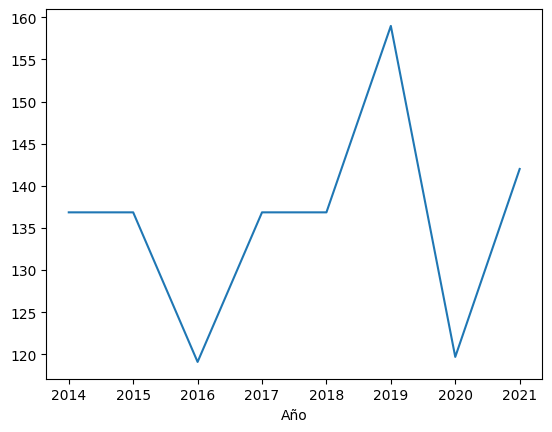

In [30]:
df_promedio_anual.plot()
plt.show()


Acá se observan las fluctuciones del consumo de agua en los años transcurridos se puede observar como en el 2020 debido a la pandemia el consumo de agua bajo y como nuevamente aumento en el 2021.

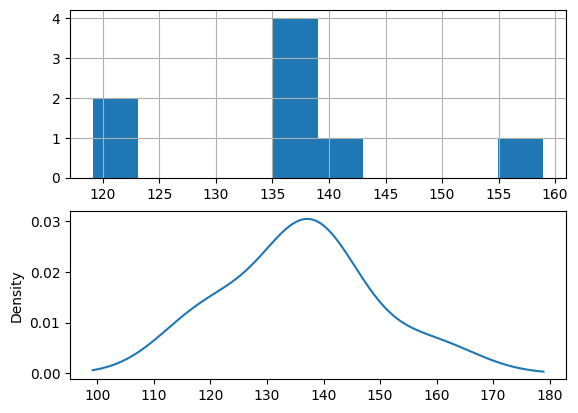

In [31]:
plt.figure(1)
plt.subplot(211)
df_promedio_anual.hist()
plt.subplot(212)
df_promedio_anual.plot(kind='kde')
plt.show()



*   En el grafíco de densidad se puede observar los lugares en donde más se acumula los datos correspondientes al consumo del agua.
*  Se observa que en el gráfico de la curva la distribución es no gaussina, evidencia de hecho es una asimetria a la derecha, lo que indica que hay mas datos distintos a la izquierda.



## 3 Modelos y algoritmos (ARIMA) <a name="id3">

El modelo ARIMA se puede entender como una "máquina del tiempo" para predecir el futuro. Piensa en una serie de datos a lo largo del tiempo, como el consumo del agua en una escala de tiempo(días, mese, años). El modelo ARIMA mira cómo esos datos se comportaron en el pasado y usa esa información para hacer una conjetura educada sobre lo que sucederá en el futuro. </br>

**ARIMA** significa AutoRegresive Integrated Moving Average, y básicamente descompone los datos en tres partes:

* ***Auto-Regresivo (AR)***: Se fija en cómo los valores pasados afectan a los valores futuros. Si el consumo de agua fue alto en el pasado, es probable que sean alto en el presente.

* ***Media Móvil (MA)***: Examina los errores o las diferencias entre los valores pasados y los valores reales. Ayuda a corregir cualquier tendencia o patrón.

* ***Diferenciación Integrada (I)***: Asegura que los datos sean estacionarios, lo que significa que no tengan tendencias claras. Si hay una tendencia ascendente, ARIMA la eliminará para hacer predicciones más precisas.

Entonces, el modelo **ARIMA** mira el pasado, ajusta los datos y hace una suposición informada sobre el futuro. Es como usar una máquina del tiempo basada en matemáticas para prever lo que sucederá con el consumo de agua en un tiempo futuro.

In [32]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

def difference(dataset):
  diff = list()
  for i in range(1, len(dataset)):
    value = dataset[i] - dataset[i - 1]
    diff.append(value)
  return Series(diff)



In [33]:
X = df_promedio_anual.values
X = X.astype('float64')

In [34]:
stationary = difference(X)
stationary.index = df_promedio_anual.index[1:]
print(stationary)

Año
2015     0.000000
2016   -17.751586
2017    17.751586
2018     0.000000
2019    22.125882
2020   -39.282602
2021    22.305642
dtype: float64


## Test de Dickey-Fuller

* Herramienta usada en estadísticas que se utiliza para determinar si una serie de datos es estacionaria o no.
* Una serie estacionaria es aquella cuyas propiedades estadísticas, como la media y la varianza, no cambian con el tiempo.
* Este test ayuda a entender si una serie de datos tiene tendencias que afectan sus características, lo que es importante en análisis de series temporales y predicciones.

In [35]:
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.622684
p-value: 0.000117
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901


La prueba de significación estadística para determinar si la serie diferenciada es estacionaria utilizando el test de Dickey-Fuller aumentado. Los resultados muestran que el valor estadístico de prueba -4,622684 es menor que el valor crítico al 5% de -3,646. Esto sugiere que podemos rechazar la hipótesis nula con un nivel de significancia inferior al 5% (es decir, una baja probabilidad de que el resultado sea una casualidad estadística). Rechazar la hipótesis nula significa que el proceso no tiene raíz unitaria y, a su vez, que la serie de tiempo es estacionaria o no tiene una estructura dependiente del tiempo.

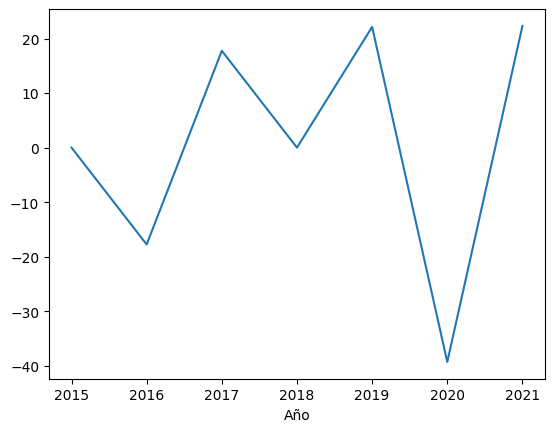

In [45]:
stationary.plot()
#plt.show()
# save
stationary.to_csv('stationary.csv', header=False)

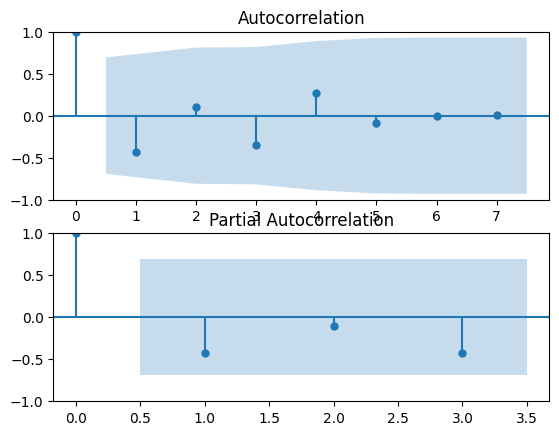

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(df_promedio_anual, lags=7, ax=plt.gca())
plt.subplot(212)
plot_pacf(df_promedio_anual, lags=3, ax=plt.gca())
plt.show()




1.   ACF: El punto que se encuentra fuera de las bandas de confianza (zona azul) indican correlaciones significativas. Estos puntos sugieren que hay patrones en los datos que se repiten en ciertos retardos este sera el valor q.
2.   PACF:  El punto que se encuentra fuera de las bandas de confianza indican correlaciones significativas después de eliminar las correlaciones en los retardos intermedios, este sera el valor p.





## Division del dataset, conjunto de entrenamiento y prueba.

In [46]:
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

## Implementación manual

In [47]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predicción
  model = ARIMA(history, order=(1,1,2))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  # observación
  obs = test[i]
  history.append(obs)
  print('>Predicción=%.3f, Esperado=%.3f' % (yhat, obs))
# desempeño
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


>Predicción=132.010, Esperado=136.844
>Predicción=132.198, Esperado=158.970
>Predicción=150.798, Esperado=119.688
>Predicción=142.660, Esperado=141.993
RMSE: 20.667


## Implementación directa con sckitLearn

In [48]:
# Evaluación del modelo
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# Carda de datos
series = df_promedio_anual
# Preparación de datos
X = series.values
X = X.astype('float64')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# Validación
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# Predicción
  yhat = history[-1]
  predictions.append(yhat)
# Observación
  obs = test[i]
  history.append(obs)
  print('>Predicción=%.3f, Esperado=%.3f' % (yhat, obs))
# desempeño
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


>Predicción=136.844, Esperado=136.844
>Predicción=136.844, Esperado=158.970
>Predicción=158.970, Esperado=119.688
>Predicción=119.688, Esperado=141.993
RMSE: 25.151


## Interpretación del Error cuadrático medio (RMSE)

* Esta medida que nos dice cuán cerca están las predicciones de un modelo estadístico de los valores reales.
* Se utiliza para evaluar cuán bien un modelo se ajusta a los datos.
* Cuanto más bajo sea el RMSE, mejor será la precisión del modelo en la predicción de valores futuros.
* Se mide en las mismas unidades que los datos originales.
* Un RMSE de 20.667 ó 25.151 indica el error medío en metro cúbicos de agua.
* Para un RMSE aceptable teniendo en cuenta que el consumo promedio por año esta en termino de millones.

## Balanceo de clases

* El concepto de balanceo de clases no es directamente aplicable a modelos ARIMA.
* En los modelos ARIMA el objetivo es modelar y predecir valores en función del tiempo, y no se trata de clasificar clases en el sentido tradicional como en problemas de clasificación.
* En el contexto de los modelos ARIMA, no se tiene una división de clases o una distribución de clases desequilibrada como en problemas de clasificación.
* En su lugar, el objetivo es modelar y predecir una variable continua a lo largo del tiempo.
* Los modelos ARIMA buscan capturar patrones de autocorrelación y estacionalidad en los datos, lo que no está relacionado con el equilibrio de clases.